In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def plot_es(es, color, ax=None, marker='o', **kwargs):
    norm = np.max(es[0])
    for k in es:
        es[k] /= norm
    if ax is None:
        fig, ax = plt.subplots()
    for k in es.keys():
        ax.plot(k * np.ones(len(es[k])), -np.log(np.abs(es[k])), lw=0, markerfacecolor='none', marker=marker, color=color, **kwargs)
    return ax

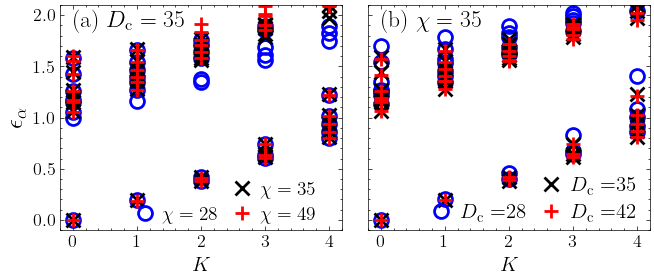

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os


plt.style.use("science")  # requires SciencePlots; remove if not installed
plt.rcParams["legend.handletextpad"] = 0.3
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13


# Common settings
L = 5
D = 7
markers = ['o', 'x', '+']
colors  = ['blue', 'black', 'red']

fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# --- Left: vary environment chi at fixed D_compress ---
D_compress = 35
for i, env_chi in enumerate([28, 35, 49]):
    filename = f"./es/es_APBC_site_0_dirn_(0,1)_L_{L:d}_D_{D:d}_D_compress_{D_compress:d}_chi_{env_chi:d}_n=0"
    if os.path.isfile(filename):
        with open(filename, "rb") as f:
            es = pickle.load(f)
        # print(filename)
        plot_es(es, color=colors[i], ax=axes[0], marker=markers[i], label=rf"$\chi={env_chi:d}$", markersize=10, markeredgewidth=2)


from matplotlib.lines import Line2D
handles, labels = axes[0].get_legend_handles_labels()
seen = set()
h, l = [], []
for hd, lb in zip(handles, labels):
    if lb not in seen:
        seen.add(lb)
        h.append(hd)
        l.append(lb)

# --- build 2-column layout: col1=[first], col2=[rest] ---
spacer = Line2D([], [], linestyle='None', marker=None, alpha=0)  # invisible
h2 = [spacer, h[0]] + h[1:]
l2 = ['', l[0]] + l[1:]

ax = axes[0]
ax.legend(
    h2, l2,
    loc=3, bbox_to_anchor=(0.17, -0.05),
    ncol=2, handletextpad=-0.1, fontsize=14,
    labelspacing=0.4, columnspacing=0.2, frameon=False
)


axes[0].set_xlabel(r"$K$", fontsize=15)
axes[0].set_ylabel(r"$\epsilon_{\alpha}$", fontsize=18)
# axes[0].set_title(r"$D_{\mathrm{c}}=36$, vary $\chi$", fontsize=13)

# --- Right: vary D_compress at fixed environment chi ---
markers = ['o', 'x', '+']
colors  = ['blue', 'black', 'red']

env_chi = 35
for i, D_compress in enumerate([28, 35, 42]):
    with open(f"./es/es_APBC_site_0_dirn_(0,1)_L_{L:d}_D_{D:d}_D_compress_{D_compress:d}_chi_{env_chi:d}_n=0", "rb") as f:
        es = pickle.load(f)
    plot_es(es, color=colors[i], ax=axes[1], marker=markers[i],
            label=r"$D_{\mathrm{c}}=$" + f"{D_compress:d}", markersize=10, markeredgewidth=2)

# ks = np.linspace(-0.2, 4.5, 30)
# axes[1].plot(ks, 0.28*ks+0.24, ls='dashed', lw=2, color='grey')

from matplotlib.lines import Line2D
handles, labels = axes[1].get_legend_handles_labels()
seen = set()
h, l = [], []
for hd, lb in zip(handles, labels):
    if lb not in seen:
        seen.add(lb)
        h.append(hd)
        l.append(lb)

# --- build 2-column layout: col1=[first], col2=[rest] ---
spacer = Line2D([], [], linestyle='None', marker=None, alpha=0)  # invisible
h2 = [spacer, h[0]] + h[1:]
l2 = ['', l[0]] + l[1:]

ax = axes[1]
ax.legend(
    h2, l2,
    loc=3, bbox_to_anchor=(0.12, -0.05),
    ncol=2, handletextpad=-0.1, fontsize=15,
    labelspacing=0.4, columnspacing=0.2, frameon=False
)

axes[1].set_xlabel(r"$K$", fontsize=15)
axes[0].set_ylim([-0.1, 2.1])

# axes[1].set_title(r"$\chi=49$, vary $D_{\mathrm{c}}$", fontsize=13)

# Optional: y-limit
# axes[0].set_ylim([-0.1, 2.4])
# after creating fig, axes = plt.subplots(1, 2, ...)
axes[0].text(0.05, 0.98, r"(a) $D_{\text{c}}=35$", transform=axes[0].transAxes,
             ha="left", va="top", fontsize=17, fontweight="extra bold")
axes[1].text(0.05, 0.98, "(b) $\chi=35$", transform=axes[1].transAxes,
             ha="left", va="top", fontsize=17, fontweight="extra bold")


plt.tight_layout()
plt.savefig("FCI_3x3_N3_D_7_edge_spectrum.pdf")



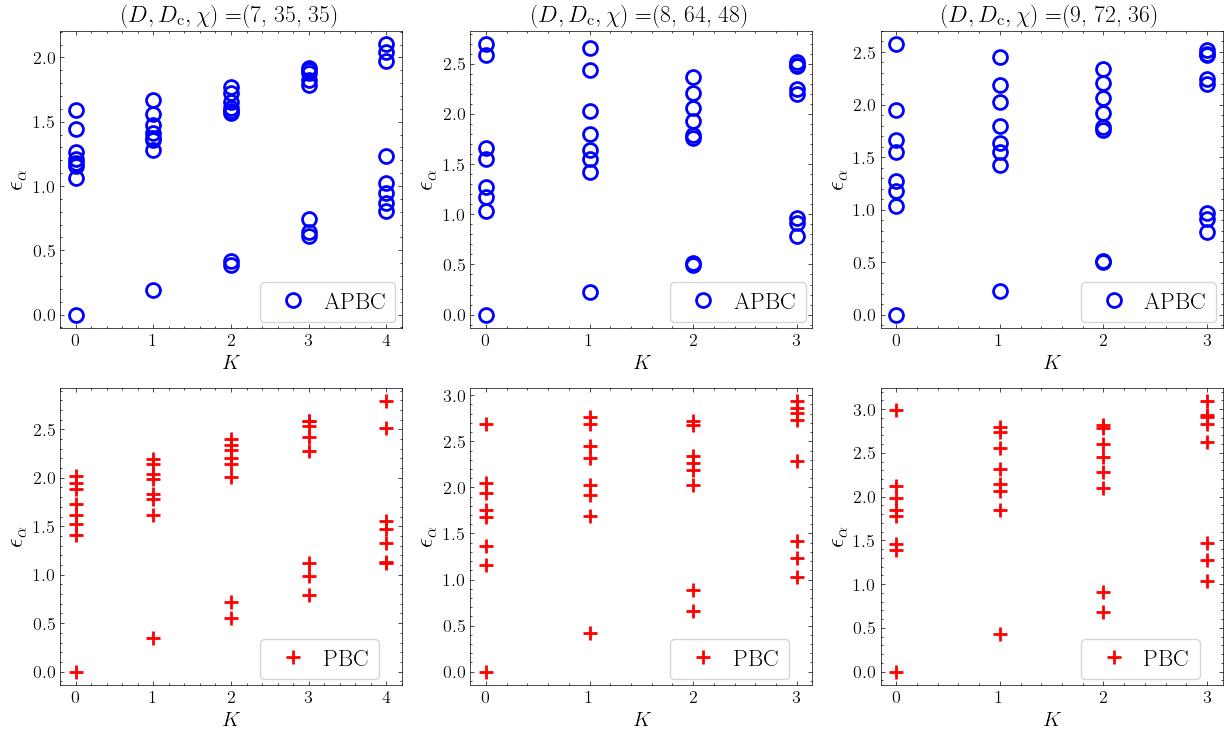

In [22]:
plt.style.use("science")

fig, axes = plt.subplots(2, 3, figsize=(15,8.5))

for i, (D, env_chi, D_compress, L) in enumerate([(7, 35, 35, 5), (8, 48, 64, 4), (9, 36, 72, 4)]):
# for i, (D, env_chi, D_compress, L) in enumerate([(4, 32, 16, 5), (8, 48, 64, 4), (9, 36, 72, 4)]):
    markers = ['o', '+']
    colors=['blue', 'red', 'black']
    ax = axes[0][i]
    with open(f"./es/es_APBC_site_0_dirn_(0,1)_L_{L:d}_D_{D:d}_D_compress_{D_compress:d}_chi_{env_chi:d}_n=0", "rb") as f:
        es = pickle.load(f)
    ax = plot_es(es, color=colors[0], ax=ax, marker=markers[0], markersize=10, markeredgewidth=2, label="APBC")
    ax.set_title(r"$(D, D_{\text{c}}, \chi)=$" + f"({D:d}, {D_compress:d}, {env_chi:d})", fontsize=17)
    ax.set_ylabel(r"$\epsilon_{\alpha}$", fontsize=18)
    ax.set_xlabel(r"$K$", fontsize=15)

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=17, loc=3, bbox_to_anchor=(0.55, -0.02), frameon=True)

    ax = axes[1][i]
    with open(f"./es/es_PBC_site_0_dirn_(0,1)_L_{L:d}_D_{D:d}_D_compress_{D_compress:d}_chi_{env_chi:d}_n=0", "rb") as f:
        es = pickle.load(f)
    ax = plot_es(es, color=colors[1], ax=ax, marker=markers[1], markersize=10, markeredgewidth=2, label="PBC")
    # if i <= 1:
    #     with open(f"FCI_env/es_PBC_site_0_dirn_(0,1)_L_{L:d}_D_{D:d}_D_compress_{D_compress:d}_chi_{env_chi:d}_n=0", "rb") as f:
    #         es = pickle.load(f)
    #     ax = plot_es(es, color=colors[1], ax=ax, marker=markers[1], label="PBC")


    # ks = np.linspace(-0.2, 4.5, 30)
    # ax.plot(ks, 0.45*ks+0.2, ls='dashed', lw=2, color='black')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=17, loc=3, bbox_to_anchor=(0.55, -0.02), frameon=True)
    ax.set_xlabel(r"$K$", fontsize=15)
    ax.set_ylabel(r"$\epsilon_{\alpha}$", fontsize=18)
    # ax.set_ylim([-0.1, 2.8])

plt.savefig("es_all.pdf")
